In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
import cdsapi

#import cdstoolbox as ct


In [44]:
ACCESS_CM2_1850_2014 = 'Downloads/data/ACCESS-CM2_historical_185001-201412_v20191108.nc'
ACCESS_CM2_1850_2014 = Dataset(ACCESS_CM2_1850_2014, mode='r')
print(ACCESS_CM2_1850_2014.variables.keys())
print(ACCESS_CM2_1850_2014.variables)
#x2 dimentions remove bounds
lats1 = ACCESS_CM2_1850_2014.variables["lat"][:]
lons1 = ACCESS_CM2_1850_2014.variables["lon"][:]
tas = ACCESS_CM2_1850_2014.variables["tas"][:]


dict_keys(['time', 'time_bnds', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'height', 'tas'])
{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1850-01-01
    calendar: proleptic_gregorian
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (1980,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (1980, 2)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    bounds: lat_bnds
    units: degrees_north
    axis: Y
    long_name: Latitude
    standard_name: latitude
unlimited dimensions: 
current shape = (144,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lat_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 lat_bnds(lat, bnds)
unlimited dimensions: 
current shape = (14

In [45]:
dates = (np.arange(tas.shape[0] ))/12.0 + 1850


In [46]:
mask = np.logical_and( dates >= 1961, dates < 1991 )
base = tas[mask,:,:]
print(base.shape)
for m in range(12):
    norm = np.nanmean(base[m::12,:,:],axis=0)
    tas[m::12,:,:] = tas[m::12,:,:] - norm
tas[np.isnan(tas)] = -1.0e30

(360, 144, 192)


Text(0.5, 1.0, 'mean global temperature increase')

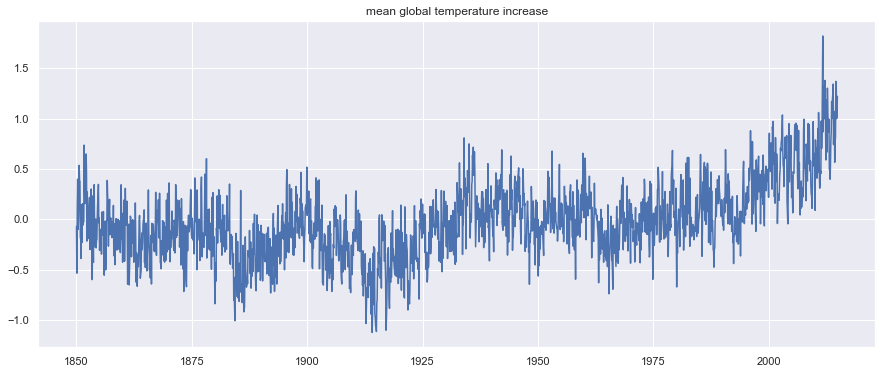

In [47]:
temp_mean = tas.mean(axis =(1,2))
avgtemp = np.average(temp_mean.reshape(-1, 12), axis=1)
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))
# Plot the responses for different events and regions
sns.lineplot(x=dates, y=temp_mean ,ax=ax)
plt.title('mean global temperature increase')


In [48]:
ACCESS_CM2_1850_2014 = 'Downloads/data/ACCESS-CM2_historical_185001-201412_v20191108.nc'
BCC_XSM2_MR_1850_2014 = 'Downloads/data/BCC-CSM2-MR_historical_85001-201412_v20181126.nc'
CanESM5_CanOE_1850_2014 ='Downloads/data/CanESM5-CanOE_historical_185001-201412_v20190429.nc'
CNRM_CM6_1850_2014 = 'Downloads/data/CNRM-CM6-1_historical_185001-201412_v20180917.nc'
GFDL_ESM4_1850_1949 = 'Downloads/data/GFDL-ESM4_historical_185001-194912_v20190726.nc'
GFDL_ESM4_1950_2014 ='Downloads/data/GFDL-ESM4_historical_195001-201412_v20190726.nc'
HadGEM_GC31_LL = 'Downloads/data/HadGEM3-GC31-LL_195001-201412_v20190624.nc'
HadGEM_GC31_LL_18500_1949='Downloads/data/HadGEM3-GC31-LL_historical_185001-194912_v20190624.nc'
KACE_18500_2014 = 'Downloads/data/KACE-1-0-G_historical_185001-201412_v20191028.nc'
MIROC6_1850_1949 = 'Downloads/data/MIROC6_historical_185001-194912_v20181212.nc'
MIROC6_1950_2014 = 'Downloads/data/MIROC6_historical_195001-201412_v20181212.nc'
UKESM1_1850_1949 = 'Downloads/data/UKESM1-0-LL_historical_185001-194912_v20190406.nc'
UKESM1_1950_2014 = 'Downloads/data/UKESM1-0-LL_historical_195001-201412_v20190406.nc'
CNRM_CM6_1850_2014 ='Downloads/data/CNRM-CM6-1-HR_185001-201412_v20191021.nc'
CESM2 = 'Downloads/data/CESM2_historical_185001-201412_v20190308.nc'
CNRM_ESM1 = 'Downloads/data/CNRM-ESM2-1_historical_185001-201412_v20181206.nc'
ACCESS_CM2_1850_2014 = Dataset(ACCESS_CM2_1850_2014, mode='r')
BCC_XSM2_MR_1850_2014 = Dataset(BCC_XSM2_MR_1850_2014, mode='r')
CanESM5_CanOE_1850_2014 = Dataset(CanESM5_CanOE_1850_2014, mode='r')
CNRM_CM6_1850_2014 = Dataset(CNRM_CM6_1850_2014, mode='r')
GFDL_ESM4_1850_1949 = Dataset(GFDL_ESM4_1850_1949, mode='r')
GFDL_ESM4_1950_2014 = Dataset(GFDL_ESM4_1950_2014, mode='r')
HadGEM_GC31_LL_1950_2014 = Dataset(HadGEM_GC31_LL, mode='r')
KACE_18500_2014 = Dataset(KACE_18500_2014, mode='r')
MIROC6_1850_1949 = Dataset(MIROC6_1850_1949, mode='r')
MIROC6_1950_2014 = Dataset(MIROC6_1950_2014, mode = 'r')
UKESM1_1850_1949 = Dataset(UKESM1_1850_1949, mode='r')
UKESM1_1950_2014 = Dataset(UKESM1_1950_2014, mode='r')
CESM2 = Dataset(CESM2, mode='r')
CNRM_ESM1 = Dataset(CNRM_ESM1, mode='r')

HadGEM_GC31_LL_18500_1949 = Dataset(HadGEM_GC31_LL_18500_1949, mode ='r')

datasets1 = [ACCESS_CM2_1850_2014,
BCC_XSM2_MR_1850_2014,
CanESM5_CanOE_1850_2014 ,
CNRM_CM6_1850_2014 ,KACE_18500_2014 ,  CESM2 , CNRM_ESM1]
names = ['ACCESS_CM2','BCC_XSM2_MR','CanESM5_CanOE' ,'CNRM_CM6' ,'KACE' , 'CESM2' ,'CNRM_ESM1']
datasets2 =[GFDL_ESM4_1850_1949, UKESM1_1850_1949 , HadGEM_GC31_LL_18500_1949 ,MIROC6_1850_1949]
names2 = ['GFDL_ESM4','UKESM1' , 'HadGEM_GC31_LL'  , 'MIROC6']
datasets3 = [GFDL_ESM4_1950_2014, UKESM1_1950_2014 , HadGEM_GC31_LL_1950_2014 ,MIROC6_1950_2014]

In [49]:
name=0
dictionnary = dict()
for d in datasets1:
    print(names[name])
    air = d.variables['tas'][:]
    mask = np.logical_and( dates > 1961, dates < 1991 )
    air[air<-500] = np.nan
    base = air[mask,:,:]
    for m in range(12):
        norm = np.nanmean(base[m::12,:,:],axis=0)
        air[m::12,:,:] = air[m::12,:,:] - norm
    air[np.isnan(air)] = -1.0e30
    temp_mean = air.mean(axis =(1,2))
    temp = temp_mean[11:-1]
    avgtemp = np.average(temp.reshape(-1, 3), axis=1)
    djf_t = []
    for i in range(0,656-4-3,4):
        djf_t.append(avgtemp[i])
    #print(len(djf_t))
    dictionnary[names[name]] = djf_t
    name+=1
    
    

ACCESS_CM2
BCC_XSM2_MR
CanESM5_CanOE
CNRM_CM6
KACE
CESM2


/var/folders/54/_py3f4ks6f9d0x8d0wfy1pkc0000gn/T/ipykernel_5802/1186950562.py:5: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  air = d.variables['tas'][:]


CNRM_ESM1


In [50]:
name = 0
for d1,d2 in zip(datasets2,datasets3):
    air1 = d1.variables['tas'][:]
    air2 = d2.variables['tas'][:]
    print(air1.shape)
    print(air2.shape)
    air=np.vstack((air1,air2))
    print(air.shape)
    air[air<-500] = np.nan
    base = air[mask,:,:]
    for m in range(12):
        norm = np.nanmean(base[m::12,:,:],axis=0)
        air[m::12,:,:] = air[m::12,:,:] - norm
    air[np.isnan(air)] = -1.0e30
    temp_mean = air.mean(axis =(1,2))
    temp = temp_mean[11:-1]
    avgtemp = np.average(temp.reshape(-1, 3), axis=1)
    djf_t = []
    for i in range(0,656-4-3,4):
        djf_t.append(avgtemp[i])
    #print(len(djf_t))
    dictionnary[names2[name]] = djf_t
    name+=1

(1200, 180, 288)
(780, 180, 288)
(1980, 180, 288)
(1200, 144, 192)
(780, 144, 192)
(1980, 144, 192)
(1200, 144, 192)
(780, 144, 192)
(1980, 144, 192)
(1200, 128, 256)
(780, 128, 256)
(1980, 128, 256)


In [51]:
true = 'Downloads/HadCRUT.nc'
fh = Dataset(true, mode='r')
tas = fh.variables["tas_mean"][:]
temp_mean = tas.mean(axis =(1,2))
true_temp=temp_mean[0:1981]
temp = temp_mean[11:-1]
avgtemp = np.average(temp.reshape(-1, 3), axis=1)
djf_t = []
for i in range(0,656-4-3,4):
    djf_t.append(avgtemp[i])
    #print(len(djf_t))
dictionnary['TRUE'] = djf_t

In [52]:
data = pd.DataFrame.from_dict(dictionnary)
data

,ACCESS_CM2,BCC_XSM2_MR,CanESM5_CanOE,CNRM_CM6,KACE,CESM2,CNRM_ESM1,GFDL_ESM4,UKESM1,HadGEM_GC31_LL,MIROC6,TRUE
0,0.375954,-0.601654,0.070961,-0.581082,-0.206761,0.057175,0.424696,-0.363606,0.640044,0.549923,0.045581,-0.348009
1,0.973208,-0.662668,-0.037884,-0.416199,-0.384065,-0.042319,0.248771,-0.324211,0.712845,0.604639,0.135325,-0.395596
2,0.497969,-0.236120,-0.114808,-0.350545,-0.173415,-0.133353,0.194304,0.041495,0.932074,0.642588,-0.020864,-0.225602
3,0.357068,-0.233272,0.024674,-0.439142,-0.275843,0.023327,-0.006229,-0.269533,0.806349,0.375610,0.286527,-0.395580
4,0.355483,-0.753469,-0.313223,-0.498021,-0.398944,-0.064955,-0.238467,-0.468456,0.632522,0.591042,0.626435,-0.318921
...,...,...,...,...,...,...,...,...,...,...,...,...
158,1.070729,0.772349,1.579082,1.164883,1.636726,1.108791,1.009894,0.657472,1.795474,1.507112,1.469412,0.619857
159,0.946666,0.733400,1.599628,0.836600,1.334453,1.507458,1.104560,0.985515,1.649651,1.816843,1.159357,0.925151
160,1.065684,0.820573,1.562484,0.973993,1.651888,1.512052,0.983257,0.578576,2.046785,2.161680,0.824013,0.729730
161,1.747993,0.953064,2.044906,0.992446,1.306054,1.466749,1.093769,0.767760,1.740632,2.242140,1.091642,0.717177


,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,model
ACCESS_CM2,0.375954,0.973208,0.497969,0.357068,0.355483,0.075743,0.457747,0.404658,0.364769,0.359265,...,0.877988,1.331639,0.754243,0.893143,1.070729,0.946666,1.065684,1.747993,1.440901,ACCESS_CM2
BCC_XSM2_MR,-0.601654,-0.662668,-0.236120,-0.233272,-0.753469,-0.352483,-0.217083,-0.243474,-0.290667,-0.375541,...,0.771382,0.562137,1.137145,0.848418,0.772349,0.733400,0.820573,0.953064,0.918503,BCC_XSM2_MR
CanESM5_CanOE,0.070961,-0.037884,-0.114808,0.024674,-0.313223,0.342073,0.041480,-0.054697,0.089825,0.022939,...,1.484307,1.195094,1.546099,1.464548,1.579082,1.599628,1.562484,2.044906,2.201975,CanESM5_CanOE
CNRM_CM6,-0.581082,-0.416199,-0.350545,-0.439142,-0.498021,-0.356450,-0.638886,-0.698903,-0.715590,-0.253494,...,0.721402,0.831528,1.195797,1.039085,1.164883,0.836600,0.973993,0.992446,1.250461,CNRM_CM6
KACE,-0.206761,-0.384065,-0.173415,-0.275843,-0.398944,-0.570094,-0.213835,-0.354035,0.150916,-0.065190,...,1.173276,1.244752,1.361589,1.447278,1.636726,1.334453,1.651888,1.306054,1.536155,KACE
CESM2,0.057175,-0.042319,-0.133353,0.023327,-0.064955,-0.464965,0.064814,-0.452447,-0.422981,0.120920,...,1.224203,1.257094,1.517293,1.265665,1.108791,1.507458,1.512052,1.466749,1.689176,CESM2
CNRM_ESM1,0.424696,0.248771,0.194304,-0.006229,-0.238467,-0.277502,-0.013747,-0.504865,0.339638,0.290103,...,1.101596,1.184901,0.985517,1.596023,1.009894,1.104560,0.983257,1.093769,1.049651,CNRM_ESM1
GFDL_ESM4,-0.363606,-0.324211,0.041495,-0.269533,-0.468456,-0.063029,0.278416,-0.076807,0.196711,-0.371597,...,0.391741,0.796102,0.320017,0.413391,0.657472,0.985515,0.578576,0.767760,0.846035,GFDL_ESM4
UKESM1,0.640044,0.712845,0.932074,0.806349,0.632522,0.871653,0.699701,0.936906,0.815910,1.031701,...,1.511475,1.248112,1.406077,1.794811,1.795474,1.649651,2.046785,1.740632,2.113947,UKESM1
HadGEM_GC31_LL,0.549923,0.604639,0.642588,0.375610,0.591042,0.710176,1.019449,1.091706,0.507917,0.833559,...,1.688518,1.776143,1.970851,1.823069,1.507112,1.816843,2.161680,2.242140,1.872814,HadGEM_GC31_LL


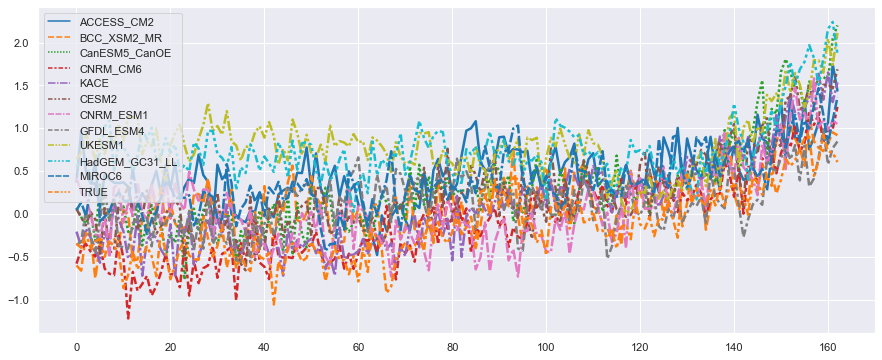

In [53]:
panel_data = data.T
panel_data['model'] = panel_data.index
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=data, palette="tab10", linewidth=2.5)
panel_data

In [54]:
panel_data.to_pickle('panel_data') 
data.to_pickle('data')

New dataset to use with predictors

In [55]:
CAMS_CSM1 = 'Downloads/data/tas_Amon_CAMS-CSM1-0_historical_r1i1p1f1_gn_185001-201412_v20190708.nc'
MPI_ESM1_1 = 'Downloads/data/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_185001-186912_v20190710.nc'
MPI_ESM1_2 ='Downloads/data/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_187001-188912_v20190710.nc'
MPI_ESM1_3 = 'Downloads/data/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_189001-190912_v20190710.nc'
MPI_ESM1_4 = 'Downloads/data/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_191001-192912_v20190710.nc'
MPI_ESM1_5 ='Downloads/data/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_193001-194912_v20190710.nc'
MPI_ESM1_6 = 'Downloads/data/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_195001-196912_v20190710.nc'
MPI_ESM1_7='Downloads/data/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_197001-198912_v20190710.nc'
MPI_ESM1_8 = 'Downloads/data/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_199001-200912_v20190710.nc'
MPI_ESM1_9 = 'Downloads/data/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_201001-201412_v20190710.nc'
INM_CM4_1 = 'Downloads/data/tas_Amon_INM-CM4-8_historical_r1i1p1f1_gr1_185001-194912_v20190530.nc'
INM_CM4_2 = 'Downloads/data/tas_Amon_INM-CM4-8_historical_r1i1p1f1_gr1_195001-199912_v20190530.nc'
INM_CM4_3 = 'Downloads/data/tas_Amon_INM-CM4-8_historical_r1i1p1f1_gr1_200001-201412_v20190530.nc'


In [56]:
CAMS_CSM1 = Dataset(CAMS_CSM1, mode='r')
MPI_ESM1_1 = Dataset(MPI_ESM1_1, mode='r')
MPI_ESM1_2 = Dataset(MPI_ESM1_2, mode='r')
MPI_ESM1_3 = Dataset(MPI_ESM1_3, mode='r')
MPI_ESM1_4 = Dataset(MPI_ESM1_4, mode='r')
MPI_ESM1_5 = Dataset(MPI_ESM1_5, mode='r')
MPI_ESM1_6 = Dataset(MPI_ESM1_6, mode='r')
MPI_ESM1_7 = Dataset(MPI_ESM1_7, mode='r')
MPI_ESM1_8 = Dataset(MPI_ESM1_8, mode='r')
MPI_ESM1_9 = Dataset(MPI_ESM1_9, mode='r')
INM_CM4_1= Dataset(INM_CM4_1, mode='r')
INM_CM4_2 = Dataset(INM_CM4_2, mode='r')
INM_CM4_3 = Dataset(INM_CM4_3, mode='r')


In [57]:
air = CAMS_CSM1.variables['tas'][:]


In [58]:
s1 = MPI_ESM1_1.variables['tas'][:]
s2 = MPI_ESM1_2.variables['tas'][:]
s3 = MPI_ESM1_3.variables['tas'][:]
s4 = MPI_ESM1_4.variables['tas'][:]
s5 = MPI_ESM1_5.variables['tas'][:]
s6 = MPI_ESM1_6.variables['tas'][:]
s7 = MPI_ESM1_7.variables['tas'][:]
s8 = MPI_ESM1_8.variables['tas'][:]
s9 = MPI_ESM1_9.variables['tas'][:]
i1 = INM_CM4_1.variables['tas'][:]
i2 = INM_CM4_2.variables['tas'][:]
i3 = INM_CM4_3.variables['tas'][:]
s = np.vstack((s1,s2,s3,s4,s5,s6,s7,s8,s9))
i = np.vstack((i1,i2,i3))
newdata = [air,s,i]
names =['CAMS_CSM1', 'MPI_ESM1', 'INM_CM4']
names1=0
for air in newdata:
    air[air<-500] = np.nan
    base = air[mask,:,:]
    for m in range(12):
        norm = np.nanmean(base[m::12,:,:],axis=0)
        air[m::12,:,:] = air[m::12,:,:] - norm
    air[np.isnan(air)] = -1.0e30
    temp_mean = air.mean(axis =(1,2))
    temp = temp_mean[11:-1]
    avgtemp = np.average(temp.reshape(-1, 3), axis=1)
    djf_t = []
    for i in range(0,656-4-3,4):
        djf_t.append(avgtemp[i])
    dictionnary[names[names1]] = djf_t
    names1+=1

In [59]:
dictionnary2 =dict()
order = ['ACCESS_CM2','CanESM5_CanOE','CAMS_CSM1','CNRM_CM6','CNRM_ESM1','HadGEM_GC31_LL','MIROC6','UKESM1','MPI_ESM1','INM_CM4','TRUE']
for i in order:
    dictionnary2[i]=dictionnary[i]

In [60]:
data2 = pd.DataFrame.from_dict(dictionnary2)
data2
panel_data2 = data2.T
panel_data2['model'] = panel_data2.index
panel_data2.to_pickle('panel_data2') 
data2.to_pickle('data2')

In [61]:
panel_data2

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,model
ACCESS_CM2,0.375954,0.973208,0.497969,0.357068,0.355483,0.075743,0.457747,0.404658,0.364769,0.359265,...,0.877988,1.331639,0.754243,0.893143,1.070729,0.946666,1.065684,1.747993,1.440901,ACCESS_CM2
CanESM5_CanOE,0.070961,-0.037884,-0.114808,0.024674,-0.313223,0.342073,0.041480,-0.054697,0.089825,0.022939,...,1.484307,1.195094,1.546099,1.464548,1.579082,1.599628,1.562484,2.044906,2.201975,CanESM5_CanOE
CAMS_CSM1,0.420861,0.155254,0.241645,-0.142521,0.105660,0.250230,-0.038423,0.037168,0.073412,0.052746,...,0.604932,0.809077,0.754230,0.704756,0.881029,0.461860,0.911565,0.747658,1.129419,CAMS_CSM1
CNRM_CM6,-0.581082,-0.416199,-0.350545,-0.439142,-0.498021,-0.356450,-0.638886,-0.698903,-0.715590,-0.253494,...,0.721402,0.831528,1.195797,1.039085,1.164883,0.836600,0.973993,0.992446,1.250461,CNRM_CM6
CNRM_ESM1,0.424696,0.248771,0.194304,-0.006229,-0.238467,-0.277502,-0.013747,-0.504865,0.339638,0.290103,...,1.101596,1.184901,0.985517,1.596023,1.009894,1.104560,0.983257,1.093769,1.049651,CNRM_ESM1
HadGEM_GC31_LL,0.549923,0.604639,0.642588,0.375610,0.591042,0.710176,1.019449,1.091706,0.507917,0.833559,...,1.688518,1.776143,1.970851,1.823069,1.507112,1.816843,2.161680,2.242140,1.872814,HadGEM_GC31_LL
MIROC6,0.045581,0.135325,-0.020864,0.286527,0.626435,-0.085767,-0.032126,0.024868,0.183334,0.251997,...,0.839724,1.089104,0.998434,1.260334,1.469412,1.159357,0.824013,1.091642,1.361308,MIROC6
UKESM1,0.640044,0.712845,0.932074,0.806349,0.632522,0.871653,0.699701,0.936906,0.815910,1.031701,...,1.511475,1.248112,1.406077,1.794811,1.795474,1.649651,2.046785,1.740632,2.113947,UKESM1
MPI_ESM1,-0.873166,-0.160150,-0.061251,0.113324,-0.402573,-0.344173,-0.511113,0.007564,-0.430379,-0.233795,...,0.681986,0.786139,0.545648,0.979177,0.758804,0.887692,1.074488,0.855597,0.682858,MPI_ESM1
INM_CM4,0.208982,-0.069049,0.171365,-0.312161,-0.411779,-0.311584,-0.170907,-0.034221,-0.236434,-0.008340,...,0.976792,0.774531,0.838556,0.660769,0.765237,1.077477,0.801303,0.719140,1.133936,INM_CM4
